# California UCR EDA
Data pulled from the FBI's UCR [dataset](https://www.ucrdatatool.gov/Search/Crime/Local/TrendsInOneVarStepTwo.cfm)

In [96]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

pd.options.display.max_rows = 50
pd.options.display.max_columns = 20

vc = pd.read_csv('/Users/sinasinai/Downloads/ca_violent_crime_rate.csv',header=4)
pc = pd.read_csv('/Users/sinasinai/Downloads/ca_property_crime_rate.csv',header=4)

In [97]:
cols = [c for c in vc if c not in ('Unnamed: 32', 'State')]
vc = vc[cols].set_index('Agency')
pc = pc[cols].set_index('Agency')

In [98]:
pc['1985'].describe()

count      315.000000
mean      5587.646032
std       2577.147258
min       1125.200000
25%       3969.500000
50%       5225.000000
75%       6567.800000
max      22761.400000
Name: 1985, dtype: float64

In [99]:
pc_rank = pc.copy()
vc_rank = vc.copy()

for c in pc_rank.columns: 
    pc_rank[c] = pc[c].rank(pct=True)
    
for c in vc_rank.columns:
    vc_rank[c] = vc[c].rank(pct=True)    

In [100]:
pc_rank

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Agency,,,,,,,,,,,,,,,,,,,,,
Adelanto Police Dept,0.619048,0.663522,0.811912,0.741214,0.803077,0.439394,0.453731,0.435673,0.197101,0.245665,...,0.486034,0.505587,0.502793,0.571031,0.567416,0.438547,0.656425,0.626741,0.667598,0.625698
Agoura Hills,NaN,0.069182,0.062696,0.044728,0.095385,0.090909,0.098507,0.125731,0.057971,0.052023,...,0.086592,0.072626,0.075419,0.130919,0.081461,0.047486,0.064246,0.061281,0.145251,0.097765
Alameda County Sheriff Department,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alameda Police Dept,0.676190,0.559748,0.579937,0.575080,0.492308,0.427273,0.650746,0.666667,0.652174,0.644509,...,0.435754,0.455307,0.544693,0.504178,0.606742,0.606145,0.586592,0.512535,0.530726,0.511173
Albany Police Dept,0.241270,0.270440,0.354232,0.271565,0.295385,0.290909,0.295522,0.266082,0.330435,0.306358,...,0.851955,0.893855,0.916201,0.857939,0.851124,0.743017,0.581006,0.621170,0.687151,0.611732
Alhambra Police Dept,0.476190,0.424528,0.391850,0.469649,0.526154,0.493939,0.370149,0.397661,0.318841,0.291908,...,0.488827,0.497207,0.382682,0.384401,0.379213,0.539106,0.460894,0.417827,0.377095,0.432961
American Canyon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.338150,...,0.321229,0.136872,0.438547,0.623955,0.671348,0.597765,0.634078,0.701950,0.558659,0.709497
Anaheim Police Dept,0.780952,0.738994,0.739812,0.753994,0.747692,0.769697,0.740299,0.716374,0.724638,0.676301,...,0.463687,0.435754,0.491620,0.442897,0.460674,0.550279,0.569832,0.646240,0.656425,0.567039
Anderson Police Dept,0.806349,0.792453,0.808777,0.853035,0.880000,0.896970,0.862687,0.883041,0.840580,0.728324,...,0.768156,0.821229,0.840782,0.952646,0.949438,0.966480,0.907821,0.983287,0.994413,0.980447


In [101]:
pc_rank.transpose()['San Francisco Police Dept']

1985    0.771429
1986    0.672956
1987    0.705329
1988    0.830671
1989    0.846154
1990    0.890909
1991    0.892537
1992    0.921053
1993    0.901449
1994    0.823699
1995    0.863768
1996    0.878613
1997    0.829545
1998    0.863636
1999    0.895184
2000    0.903409
2001         NaN
2002    0.840336
2003    0.867232
2004    0.837535
2005    0.832402
2006    0.899441
2007    0.896648
2008    0.888579
2009    0.907303
2010    0.891061
2011    0.891061
2012    0.924791
2013    0.972067
2014    0.972067
Name: San Francisco Police Dept, dtype: float64

In [102]:
sfvc = vc_rank.transpose()['San Francisco Police Dept']
sfpc = pc_rank.transpose()['San Francisco Police Dept']

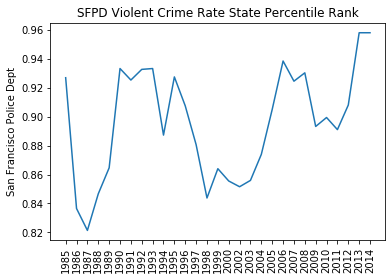

In [103]:
f = sns.lineplot(x=sfvc.index,y=sfvc)
f.set_title('SFPD Violent Crime Rate State Percentile Rank')
plt.xticks(rotation=90)
plt.show()

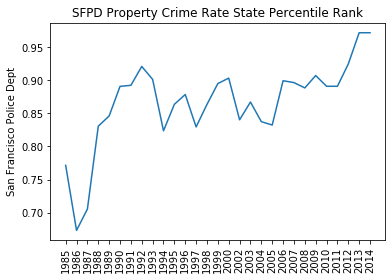

In [104]:
f = sns.lineplot(x=sfpc.index,y=sfpc)
f.set_title('SFPD Property Crime Rate State Percentile Rank')
plt.xticks(rotation=90)
plt.show()

In [105]:
vcpc = pd.DataFrame(sfpc).merge(sfvc,how='inner',left_index=True,right_index=True,suffixes=[' Property Crime',' Violent Crime'])

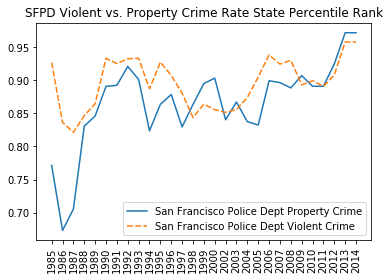

In [106]:
f = sns.lineplot(data=vcpc)
f.set_title('SFPD Violent vs. Property Crime Rate State Percentile Rank')
plt.xticks(rotation=90)
plt.show()